# Análisis de Sentimiento en Tweets de Aerolíneas ✈️

Este proyecto analiza un conjunto de tweets relacionados con aerolíneas para identificar sentimientos (positivos, negativos, neutros) y patrones de quejas. El objetivo es entender mejor la percepción de los usuarios y evaluar las razones más frecuentes de insatisfacción.


In [1885]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("crowdflower/twitter-airline-sentiment")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\pablo\.cache\kagglehub\datasets\crowdflower\twitter-airline-sentiment\versions\4


In [1886]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv('Tweets.csv')
df.head(5)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


# Voy a ver qué tipo de datos tengo en las columnas


In [1888]:
df.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [1889]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

# Valores faltantes de las columnas


In [1891]:
df.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

# Eliminar variables que no me interesan o que tienen muchos faltantes y no sirven 


In [1893]:
df = df.drop(['tweet_id', 'name', 'airline_sentiment_gold', 'negativereason_gold', 'tweet_coord'], axis = 1)
df.head(5)

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,retweet_count,text,tweet_created,tweet_location,user_timezone
0,neutral,1.0000,NaN,NaN,Virgin America,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,positive,0.3486,NaN,0.0000,Virgin America,0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,neutral,0.6837,NaN,NaN,Virgin America,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,negative,1.0000,Bad Flight,0.7033,Virgin America,0,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,negative,1.0000,Can't Tell,1.0000,Virgin America,0,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [1894]:
df.isnull().sum()

airline_sentiment                  0
airline_sentiment_confidence       0
negativereason                  5462
negativereason_confidence       4118
airline                            0
retweet_count                      0
text                               0
tweet_created                      0
tweet_location                  4733
user_timezone                   4820
dtype: int64

# Análisis de los valores de cada columna

In [1896]:
df['negativereason'].value_counts()

negativereason
Customer Service Issue         2910
Late Flight                    1665
Can't Tell                     1190
Cancelled Flight                847
Lost Luggage                    724
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     481
longlines                       178
Damaged Luggage                  74
Name: count, dtype: int64

In [1897]:
df['airline_sentiment'].value_counts()

airline_sentiment
negative    9178
neutral     3099
positive    2363
Name: count, dtype: int64

In [1898]:
df['tweet_location'].value_counts()

tweet_location
Boston, MA              157
New York, NY            156
Washington, DC          150
New York                127
USA                     126
                       ... 
Seattle (duh!)            1
South ~O-H-I-O~ Side      1
Pocono Raceway            1
denver, co                1
Nigeria,lagos             1
Name: count, Length: 3081, dtype: int64

In [1899]:
df['tweet_created'].value_counts()

tweet_created
2015-02-24 09:54:34 -0800    5
2015-02-24 11:43:05 -0800    4
2015-02-24 11:32:49 -0800    3
2015-02-23 10:58:58 -0800    3
2015-02-24 11:38:47 -0800    3
                            ..
2015-02-22 18:44:20 -0800    1
2015-02-22 18:42:36 -0800    1
2015-02-22 18:40:39 -0800    1
2015-02-22 18:39:11 -0800    1
2015-02-22 11:58:51 -0800    1
Name: count, Length: 14247, dtype: int64

In [1900]:
df['user_timezone'].value_counts()

user_timezone
Eastern Time (US & Canada)    3744
Central Time (US & Canada)    1931
Pacific Time (US & Canada)    1208
Quito                          738
Atlantic Time (Canada)         497
                              ... 
Warsaw                           1
Bucharest                        1
Wellington                       1
Sarajevo                         1
Saskatchewan                     1
Name: count, Length: 85, dtype: int64

In [1901]:
df.describe()

,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,14640.000000,10522.000000,14640.000000
mean,0.900169,0.638298,0.082650
std,0.162830,0.330440,0.745778
min,0.335000,0.000000,0.000000
25%,0.692300,0.360600,0.000000
50%,1.000000,0.670600,0.000000
75%,1.000000,1.000000,0.000000
max,1.000000,1.000000,44.000000


In [1902]:
df.head(5)

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,retweet_count,text,tweet_created,tweet_location,user_timezone
0,neutral,1.0000,NaN,NaN,Virgin America,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,positive,0.3486,NaN,0.0000,Virgin America,0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,neutral,0.6837,NaN,NaN,Virgin America,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,negative,1.0000,Bad Flight,0.7033,Virgin America,0,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,negative,1.0000,Can't Tell,1.0000,Virgin America,0,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


# Ver si los faltantes de negativereason se alinean con airline_sentiment. 
    Porque si en airline_sentiment tiene valor neutral o positivo, tiene lógica que hayan valores faltantes en esa fila en la columna de negative reason



In [1904]:
df_sin_nan_negreason = df[df['negativereason'].isna()]
df_sin_nan_negreason[df_sin_nan_negreason['airline_sentiment'] == 'negative']

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,retweet_count,text,tweet_created,tweet_location,user_timezone


### No puedo eliminar los valores faltantes de negativereason porque eliminaria sentimientos positivos o neutros de la columna airline_sentiment y afectaria al modelo.

In [1906]:
df.isnull().sum()

airline_sentiment                  0
airline_sentiment_confidence       0
negativereason                  5462
negativereason_confidence       4118
airline                            0
retweet_count                      0
text                               0
tweet_created                      0
tweet_location                  4733
user_timezone                   4820
dtype: int64

# Ver si los faltantes de negativereason_confidence se alinean con airline_sentiment. 


In [1908]:
df_sin_nan_negconf = df[df['negativereason_confidence'].isna()]
df_sin_nan_negconf[df_sin_nan_negconf['airline_sentiment'] == 'negative']

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,retweet_count,text,tweet_created,tweet_location,user_timezone


### No puedo eliminar los valores faltantes de negativereason_confidence porque eliminaria sentimientos positivos o neutros de la columna airline_sentiment y afectaria al modelo.

In [1910]:
df.head(5)

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,retweet_count,text,tweet_created,tweet_location,user_timezone
0,neutral,1.0000,NaN,NaN,Virgin America,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,positive,0.3486,NaN,0.0000,Virgin America,0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,neutral,0.6837,NaN,NaN,Virgin America,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,negative,1.0000,Bad Flight,0.7033,Virgin America,0,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,negative,1.0000,Can't Tell,1.0000,Virgin America,0,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


## EDA

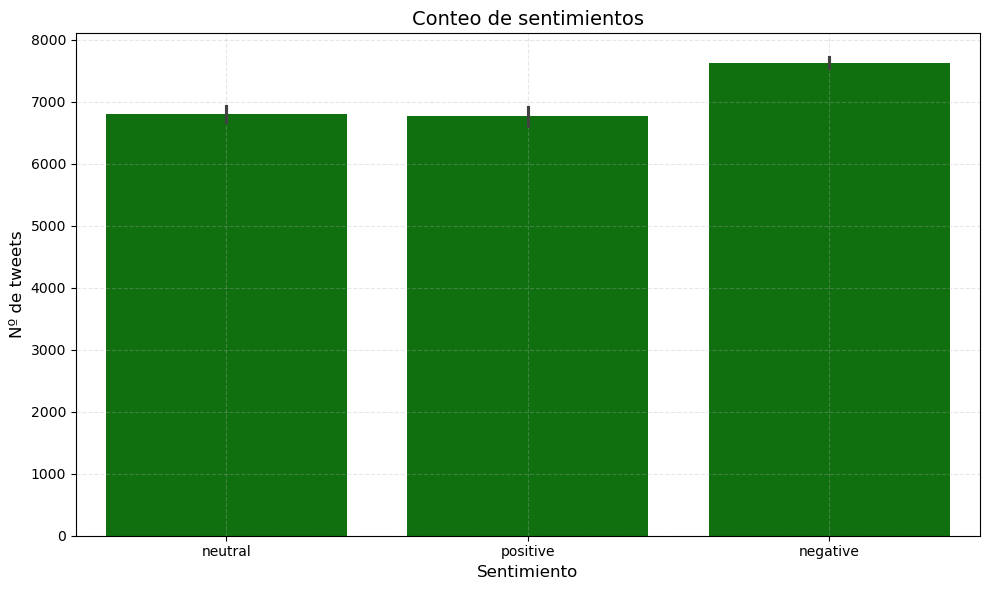

In [1912]:
# Conteo de tweets por cada sentimiento
plt.figure(figsize=(10, 6))
sns.barplot(x= df['airline_sentiment'].values, y=df['airline_sentiment'].index, color = 'green')
plt.xlabel('Sentimiento', fontsize = 12)
plt.ylabel('Nº de tweets', fontsize = 12)
plt.title('Conteo de sentimientos', fontsize = 14)
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

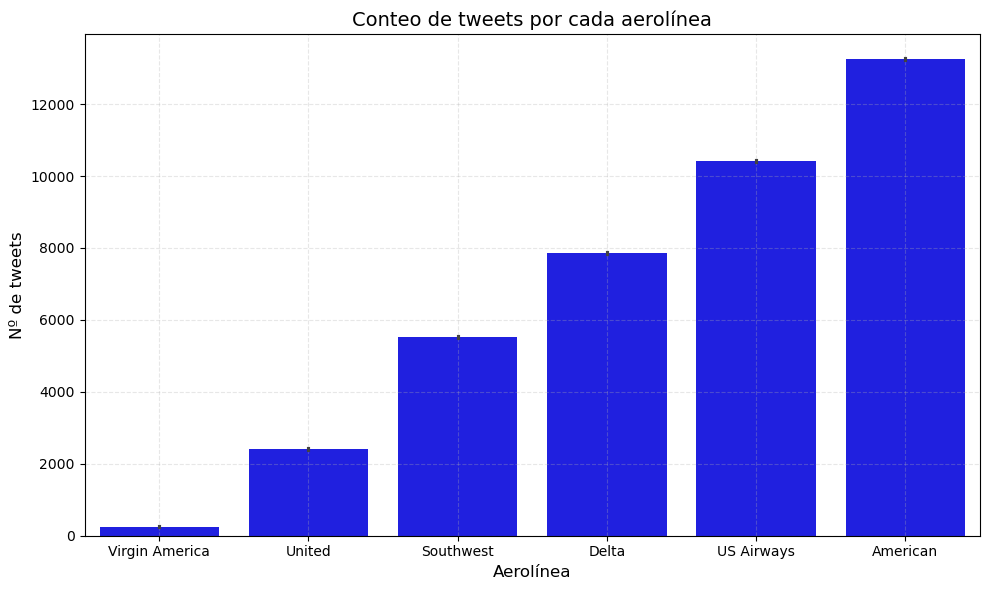

In [1913]:
# Conteo de tweets hacia cada aerolinea (independientemente del sentimiento)
plt.figure(figsize=(10, 6))
sns.barplot(x= df['airline'].values, y=df['airline_sentiment'].index, color = 'blue')
plt.xlabel('Aerolínea', fontsize = 12)
plt.ylabel('Nº de tweets', fontsize = 12)
plt.title('Conteo de tweets por cada aerolínea', fontsize = 14)
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

C:\Users\pablo\AppData\Local\Temp\ipykernel_59452\3507057623.py:2: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:red'` for the same effect.

  sns.barplot(x= df['airline'].values, y=df['airline_sentiment'].index, hue = df['airline_sentiment'], color = 'red')


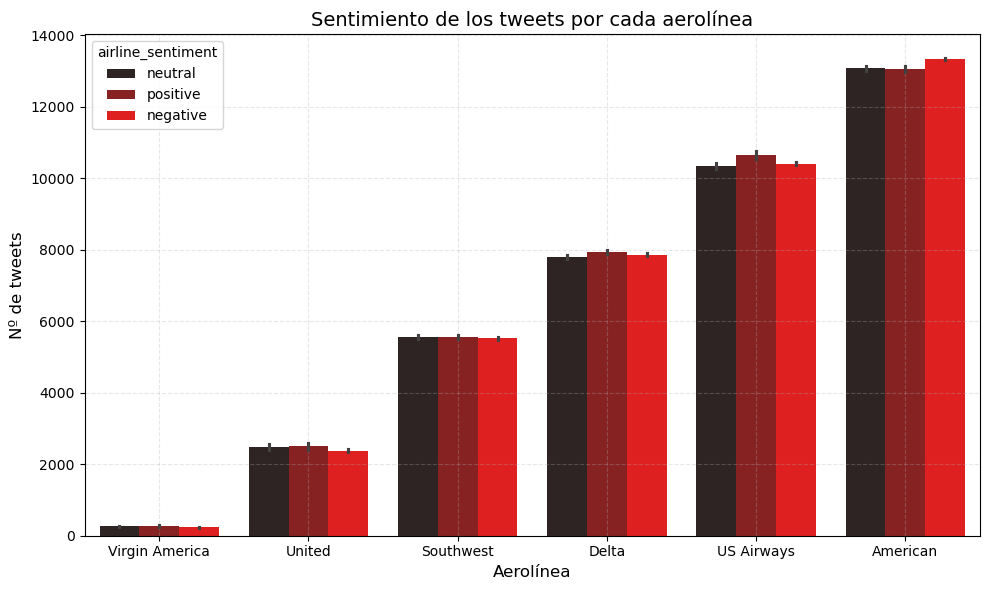

In [1914]:
plt.figure(figsize=(10, 6))
sns.barplot(x= df['airline'].values, y=df['airline_sentiment'].index, hue = df['airline_sentiment'], color = 'red')
plt.xlabel('Aerolínea', fontsize = 12)
plt.ylabel('Nº de tweets', fontsize = 12)
plt.title('Sentimiento de los tweets por cada aerolínea', fontsize = 14)
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

C:\Users\pablo\AppData\Local\Temp\ipykernel_59452\3820531262.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(df['negativereason'].value_counts(), palette = 'Set2')


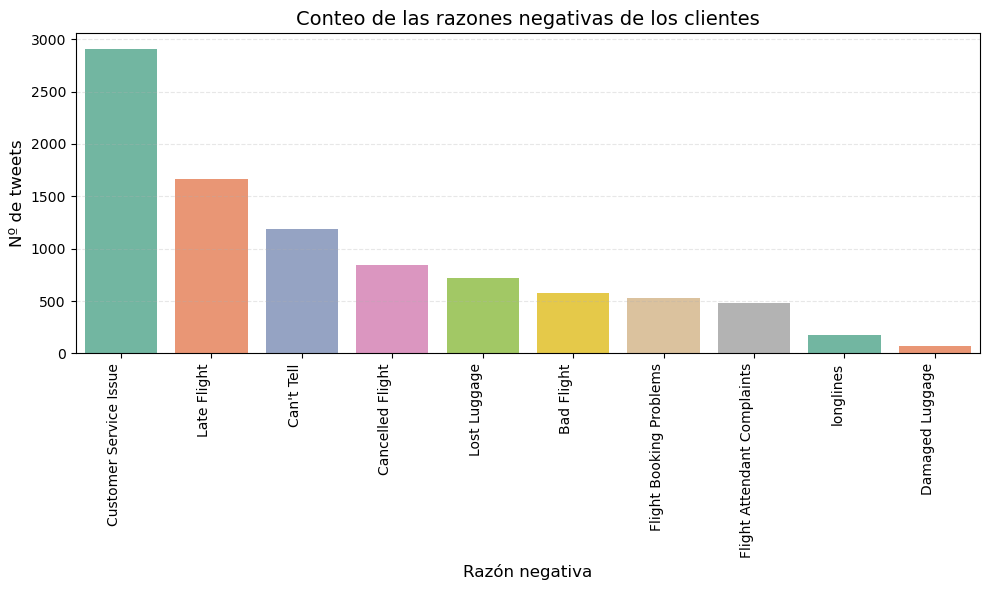

In [1915]:
plt.figure(figsize=(10, 6))
sns.barplot(df['negativereason'].value_counts(), palette = 'Set2')
plt.xlabel('Razón negativa', fontsize = 12)
plt.ylabel('Nº de tweets', fontsize = 12)
plt.xticks(rotation = 90, ha='right', fontsize = 10)
plt.title('Conteo de las razones negativas de los clientes', fontsize = 14)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


C:\Users\pablo\AppData\Local\Temp\ipykernel_59452\283216049.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.pointplot(data=df, x='airline_sentiment', y='retweet_count', palette='Set2')


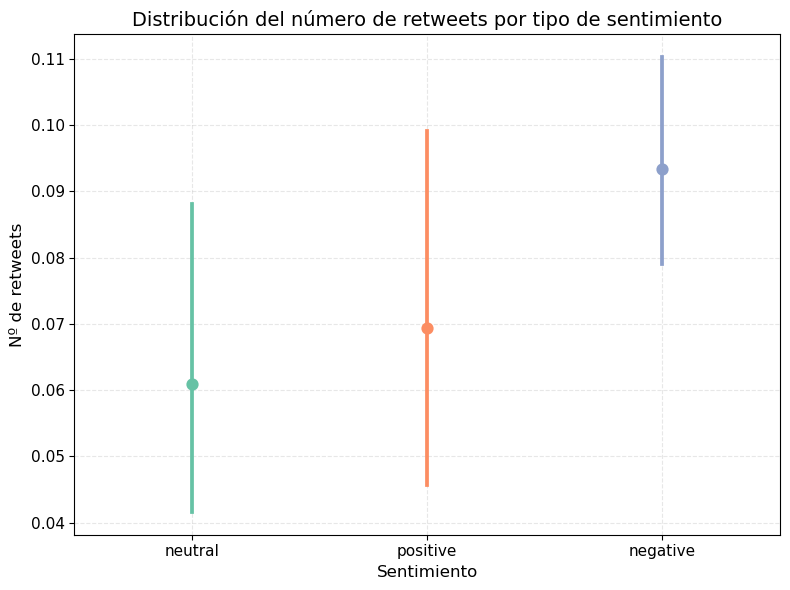

In [1916]:
plt.figure(figsize=(8, 6))
sns.pointplot(data=df, x='airline_sentiment', y='retweet_count', palette='Set2')
plt.xlabel('Sentimiento', fontsize=12)
plt.ylabel('Nº de retweets', fontsize=12)
plt.title('Distribución del número de retweets por tipo de sentimiento', fontsize=14)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

#### Aquí se puede ver que se viraliza más las opiniones negativas

C:\Users\pablo\AppData\Local\Temp\ipykernel_59452\3704096405.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='airline_sentiment', y='airline_sentiment_confidence', palette='Set2')


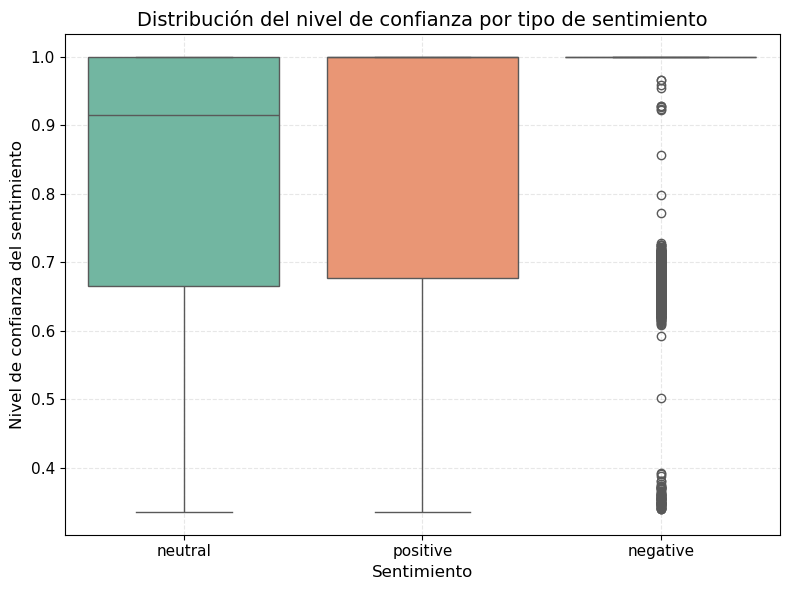

In [1918]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='airline_sentiment', y='airline_sentiment_confidence', palette='Set2')
plt.xlabel('Sentimiento', fontsize=12)
plt.ylabel('Nivel de confianza del sentimiento', fontsize=12)
plt.title('Distribución del nivel de confianza por tipo de sentimiento', fontsize=14)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


C:\Users\pablo\AppData\Local\Temp\ipykernel_59452\590388086.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='negativereason', y='negativereason_confidence', palette='Set2')


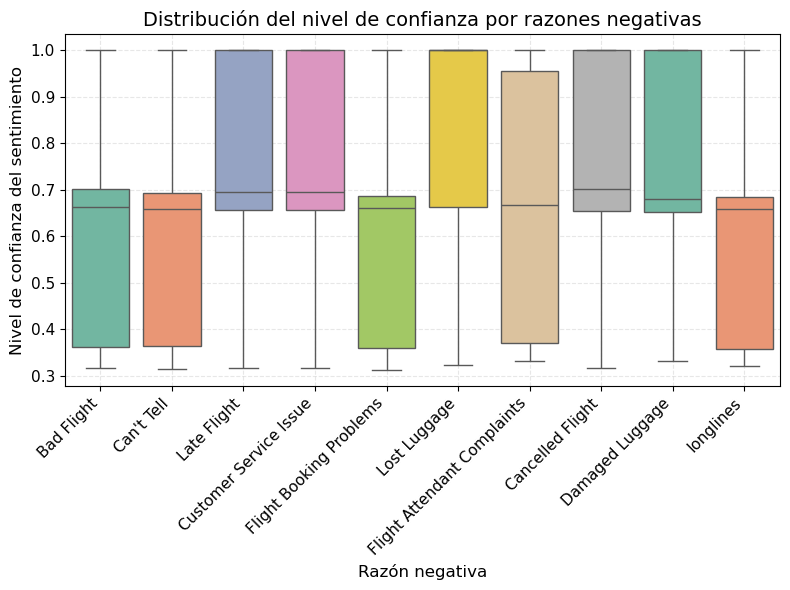

In [1919]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='negativereason', y='negativereason_confidence', palette='Set2')
plt.xlabel('Razón negativa', fontsize=12)
plt.ylabel('Nivel de confianza del sentimiento', fontsize=12)
plt.title('Distribución del nivel de confianza por razones negativas', fontsize=14)
plt.xticks(fontsize=11, ha = 'right', rotation = 45)
plt.yticks(fontsize=11)
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# Se observa que hay algunas razones que ponen los usuarios en Twiteer que no transmiten confianza. Habria que averiguar el por qué.


# Estudio de por qué "Bad flight" tiene poca confianza


In [1922]:
df_bad_flight = df[df['negativereason'] == 'Bad Flight']
df_bad_flight.head(5)

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,retweet_count,text,tweet_created,tweet_location,user_timezone
3,negative,1.0000,Bad Flight,0.7033,Virgin America,0,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
17,negative,1.0000,Bad Flight,1.0000,Virgin America,0,@VirginAmerica I flew from NYC to SFO last we...,2015-02-24 09:39:46 -0800,this place called NYC,Eastern Time (US & Canada)
28,negative,1.0000,Bad Flight,1.0000,Virgin America,0,@VirginAmerica amazing to me that we can't get...,2015-02-24 05:05:28 -0800,"San Mateo, CA & Las Vegas, NV",NaN
162,negative,1.0000,Bad Flight,1.0000,Virgin America,0,@virginamerica why don't any of the pairings i...,2015-02-22 10:19:45 -0800,"Washington, DC",Eastern Time (US & Canada)
209,negative,0.7053,Bad Flight,0.7053,Virgin America,0,@VirginAmerica seats in Row 8 don't recline sh...,2015-02-21 13:30:18 -0800,CT,Eastern Time (US & Canada)


In [1923]:
df_bad_flight['airline_sentiment'].value_counts()

airline_sentiment
negative    580
Name: count, dtype: int64

In [1924]:
df_bad_flight['airline'].value_counts()

airline
United            216
US Airways        104
Southwest          90
American           87
Delta              64
Virgin America     19
Name: count, dtype: int64

# Voy a ver si la confianza con el sentimiento de la aerolinea es coherente



In [1926]:
umbral = 0.5
df_bad_flight[df_bad_flight['airline_sentiment_confidence'] < umbral]

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,retweet_count,text,tweet_created,tweet_location,user_timezone
7154,negative,0.3477,Bad Flight,0.3477,Delta,0,nope. RT @JetBlue: Our fleet's on fleek. http:...,2015-02-23 10:20:34 -0800,Pittsburgh — now & forever,Central Time (US & Canada)
8188,negative,0.3730,Bad Flight,0.3730,Delta,1,@JetBlue why do you have every channel but @AB...,2015-02-19 20:22:03 -0800,NaN,NaN
10075,negative,0.3430,Bad Flight,0.3430,US Airways,0,@USairways E190 lands without nose gear in Hou...,2015-02-22 09:18:07 -0800,USA,Sydney


In [1927]:
baja_conf = df_bad_flight[df_bad_flight['airline_sentiment_confidence'] < umbral]

for tweet in baja_conf['text'].head(10):
    print(tweet)
    print('-' * 80)


nope. RT @JetBlue: Our fleet's on fleek. http://t.co/9SHhTvIOTI
--------------------------------------------------------------------------------
@JetBlue why do you have every channel but @ABCNetwork How are @kgonzales89 and I supposed to watch Scandal? But free FlyFi is sweet!
--------------------------------------------------------------------------------
@USairways E190 lands without nose gear in Houston - @Flightglobal http://t.co/Yf9NhMwyFF
--------------------------------------------------------------------------------


### Ahora entiendo la poca confianza que se tenia en Airline_sentiment_confidence. No son tweets negativos, más bien neutros y objetivos. 
### Posiblemente elimine estas columnas

# Voy a ver si la confianza con la razon negativa es coherente


In [1930]:
umbral = 0.5
df_bad_flight[df_bad_flight['negativereason_confidence'] < umbral]

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,retweet_count,text,tweet_created,tweet_location,user_timezone
249,negative,0.6706,Bad Flight,0.3514,Virgin America,0,"@VirginAmerica - the passenger in 7D, Flt 338 ...",2015-02-21 02:36:29 -0800,NaN,Eastern Time (US & Canada)
262,negative,0.6965,Bad Flight,0.3634,Virgin America,0,@VirginAmerica #wtf I paid for direct flight o...,2015-02-20 17:16:37 -0800,San Francisco,Pacific Time (US & Canada)
433,negative,1.0000,Bad Flight,0.3556,Virgin America,0,@VirginAmerica kinda sucked my earphone jack d...,2015-02-18 08:22:39 -0800,"New York, NY",Central Time (US & Canada)
513,negative,0.6735,Bad Flight,0.3476,United,0,@united Gate agent hooked me up with alternate...,2015-02-24 11:19:32 -0800,"Columbus, Ohio",Eastern Time (US & Canada)
674,negative,0.6771,Bad Flight,0.3542,United,0,@united I'm not a child. I'm someone who has a...,2015-02-24 04:52:36 -0800,Seattle,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...
14229,negative,1.0000,Bad Flight,0.3363,American,0,@AmericanAir Stuck on the plane in Charlotte. ...,2015-02-22 16:09:44 -0800,saint paul,NaN
14408,negative,1.0000,Bad Flight,0.3576,American,0,@AmericanAir \n\nSeats gvn away. 7 strangers i...,2015-02-22 14:11:10 -0800,"Rossford, Ohio",Atlantic Time (Canada)
14460,negative,1.0000,Bad Flight,0.3488,American,0,@AmericanAir I get &amp; can appreciate that. ...,2015-02-22 13:41:24 -0800,"Plano, TX",Central Time (US & Canada)
14484,negative,0.7039,Bad Flight,0.3587,American,0,"@AmericanAir after all, the plane didn’t land ...",2015-02-22 13:22:57 -0800,"College Station, TX",Central Time (US & Canada)


In [1931]:
baja_conf_reason = df_bad_flight[df_bad_flight['negativereason_confidence'] < umbral]
baja_conf_reason['negativereason'].value_counts()

negativereason
Bad Flight    194
Name: count, dtype: int64

In [1932]:
for tweet in baja_conf_reason['text'].head(10):
    print(tweet)
    print('-' * 80)


@VirginAmerica - the passenger in 7D, Flt 338 that assaulted me shouldn't have flown. I trust he's banned. Crew filed report to @FAANews
--------------------------------------------------------------------------------
@VirginAmerica #wtf I paid for direct flight on purpose not to have to stop for fuel exhausted frequent flier and nothing for inconvenience!
--------------------------------------------------------------------------------
@VirginAmerica kinda sucked my earphone jack didn't work on my flight. They may want to look into that for future passengers
--------------------------------------------------------------------------------
@united Gate agent hooked me up with alternate flights. If you have a way to PREVENT the constant issues, that would rock.
--------------------------------------------------------------------------------
@united I'm not a child. I'm someone who has an issue with flying and prepares ahead of time to reduce the distress caused by planes. You
------------

### Aqui sí que parece que hay opiniones negativas. No es coherente que tengan baja confianza. Son 194 filas de 14600 del total del DF las que tienen baja confianza en la razón negativa pero realmente sí son opiniones negativas. Las voy a eliminar.

### También voy a eliminar los 3 tweets anteriores que tenian baja confianza en airline_sentiment_confidence y tampoco era coherente.

### 197 filas de 14640 representa un 1%, por lo que se eliminan

In [1934]:
df = df[~(
    (df['airline_sentiment'] == 'negative') &
    (df['airline_sentiment_confidence'] < 0.5) | (df['negativereason_confidence'] < 0.5)
    )
]


In [1935]:
df['airline_sentiment'].value_counts()

airline_sentiment
negative    7397
neutral     2085
positive    2033
Name: count, dtype: int64

# Estudio de por qué "Cant't tell" tiene poca confianza


In [1937]:
df_cant_tell = df[df['negativereason'] == "Can't Tell"]
df_cant_tell.head(5)

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,retweet_count,text,tweet_created,tweet_location,user_timezone
4,negative,1.0,Can't Tell,1.0000,Virgin America,0,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
5,negative,1.0,Can't Tell,0.6842,Virgin America,0,@VirginAmerica seriously would pay $30 a fligh...,2015-02-24 11:14:33 -0800,NaN,Pacific Time (US & Canada)
26,negative,1.0,Can't Tell,0.6614,Virgin America,0,@VirginAmerica What happened 2 ur vegan food o...,2015-02-24 07:11:37 -0800,NaN,NaN
83,negative,1.0,Can't Tell,1.0000,Virgin America,0,@VirginAmerica I have no interesting flying wi...,2015-02-23 10:54:36 -0800,NaN,Pacific Time (US & Canada)
84,negative,1.0,Can't Tell,1.0000,Virgin America,0,@VirginAmerica it was a disappointing experien...,2015-02-23 10:38:14 -0800,NaN,Pacific Time (US & Canada)


In [1938]:
df_cant_tell['airline_sentiment'].value_counts()

airline_sentiment
negative    813
Name: count, dtype: int64

In [1939]:
for tweet in df_cant_tell['text'].head(10):
    print(tweet)
    print('-' * 80)

@VirginAmerica and it's a really big bad thing about it
--------------------------------------------------------------------------------
@VirginAmerica seriously would pay $30 a flight for seats that didn't have this playing.
it's really the only bad thing about flying VA
--------------------------------------------------------------------------------
@VirginAmerica What happened 2 ur vegan food options?! At least say on ur site so i know I won't be able 2 eat anything for next 6 hrs #fail
--------------------------------------------------------------------------------
@VirginAmerica I have no interesting flying with you after this. I will Cancelled Flight my next four flights I planned.#neverflyvirginforbusiness
--------------------------------------------------------------------------------
@VirginAmerica it was a disappointing experience which will be shared with every business traveler I meet. #neverflyvirgin
-------------------------------------------------------------------------

### Solo hay 813 tweets de Can't tell. Poca representación, en torno al 5%
### Esta opinión implica que no se ha podido identificar claramente por qué el tweet es negativo. Esto añade ambigüedad al análisis, y es poco útil si quieres trabajar con razones negativas concretas.
### Potencial ruido para modelos
### Voy a eliminar estos tweets

In [1941]:
df = df[df['negativereason'] != "Can't Tell"]


In [1942]:
df['airline_sentiment'].value_counts()

airline_sentiment
negative    6584
neutral     2085
positive    2033
Name: count, dtype: int64

# Estudio de por qué "Flight Booking Problems" tiene poca confianza

In [1944]:
df_flight_book_problem = df[df['negativereason'] == 'Flight Booking Problems']
df_flight_book_problem.head(5)

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,retweet_count,text,tweet_created,tweet_location,user_timezone
30,negative,1.0000,Flight Booking Problems,1.0000,Virgin America,0,@VirginAmerica hi! I just bked a cool birthday...,2015-02-23 22:52:29 -0800,NaN,Vienna
41,negative,0.6688,Flight Booking Problems,0.6688,Virgin America,0,"@VirginAmerica Hey, first time flyer next week...",2015-02-23 17:00:40 -0800,Iowa City,Central Time (US & Canada)
55,negative,0.6939,Flight Booking Problems,0.6939,Virgin America,0,@VirginAmerica hi! i'm so excited about your $...,2015-02-23 15:05:09 -0800,"new york, new york",Eastern Time (US & Canada)
85,negative,1.0000,Flight Booking Problems,1.0000,Virgin America,0,@VirginAmerica I’m having trouble adding this ...,2015-02-23 10:29:19 -0800,"Lower Pacific Heights, SF, CA",Pacific Time (US & Canada)
98,negative,1.0000,Flight Booking Problems,0.6714,Virgin America,0,@virginamerica What is your phone number. I ca...,2015-02-23 08:29:21 -0800,"Sterling Heights, MI",Eastern Time (US & Canada)


In [1945]:
df_flight_book_problem['airline_sentiment'].value_counts()

airline_sentiment
negative    345
Name: count, dtype: int64

In [1946]:
df_flight_book_problem['airline'].value_counts()

airline
United            100
American           85
US Airways         81
Southwest          37
Delta              22
Virgin America     20
Name: count, dtype: int64

In [1947]:
df_flight_book_problem['negativereason_confidence'].value_counts()

negativereason_confidence
1.0000    77
0.6667     5
0.6809     4
0.6939     4
0.6458     3
          ..
0.6559     1
0.6753     1
0.7039     1
0.6832     1
0.6643     1
Name: count, Length: 209, dtype: int64

In [1948]:
df_flight_book_problem['airline_sentiment_confidence'].value_counts()

airline_sentiment_confidence
1.0000    272
0.6991      2
0.6319      2
0.6923      2
0.6939      2
         ... 
0.6526      1
0.6793      1
0.6596      1
0.7039      1
0.6941      1
Name: count, Length: 69, dtype: int64

In [1949]:
for tweet in df_flight_book_problem['text'].head(10):
    print(tweet)
    print('-' * 80)

@VirginAmerica hi! I just bked a cool birthday trip with you, but i can't add my elevate no. cause i entered my middle name during Flight Booking Problems 😢
--------------------------------------------------------------------------------
@VirginAmerica Hey, first time flyer next week - excited! But I'm having a hard time getting my flights added to my Elevate account. Help?
--------------------------------------------------------------------------------
@VirginAmerica hi! i'm so excited about your $99 LGA-&gt;DAL deal- but i've been trying 2 book since last week &amp; the page never loads. thx!
--------------------------------------------------------------------------------
@VirginAmerica I’m having trouble adding this flight my wife booked to my Elevate account. Help? http://t.co/pX8hQOKS3R
--------------------------------------------------------------------------------
@virginamerica What is your phone number. I can't find who to call about a flight reservation.
---------------------

In [1950]:
umbral = 0.5
df_flight_book_problem[df_flight_book_problem['airline_sentiment_confidence'] < umbral]

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,retweet_count,text,tweet_created,tweet_location,user_timezone


In [1951]:
umbral = 0.5
df_flight_book_problem[df_flight_book_problem['negativereason_confidence'] < umbral]

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,retweet_count,text,tweet_created,tweet_location,user_timezone


### Vemos que no tenemos ningún tweet por debajo del umbral. Vamos a comprobar el boxplot inicial de la confianza por cada razón negativa

C:\Users\pablo\AppData\Local\Temp\ipykernel_59452\2616024364.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='negativereason', y='negativereason_confidence', palette='Set2')


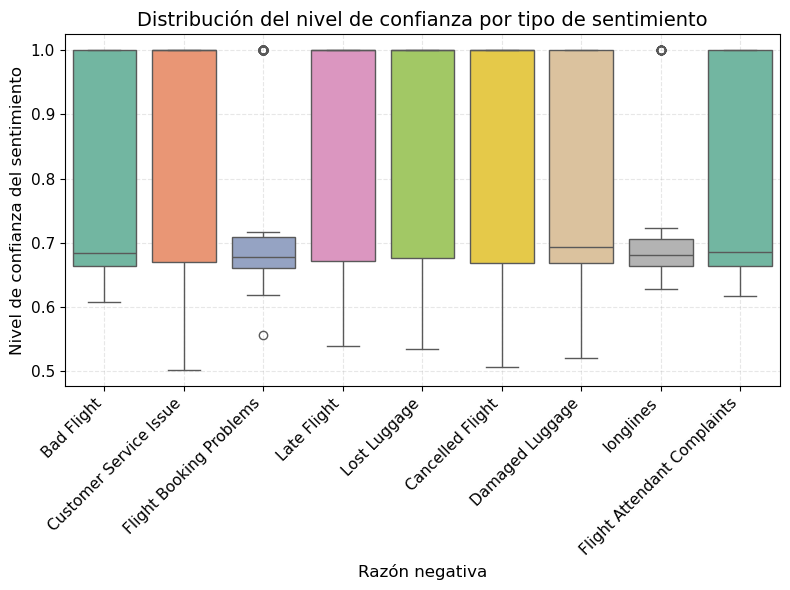

In [1953]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='negativereason', y='negativereason_confidence', palette='Set2')
plt.xlabel('Razón negativa', fontsize=12)
plt.ylabel('Nivel de confianza del sentimiento', fontsize=12)
plt.title('Distribución del nivel de confianza por tipo de sentimiento', fontsize=14)
plt.xticks(fontsize=11, ha = 'right', rotation = 45)
plt.yticks(fontsize=11)
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# Resumen general hasta ahora:
    Filtré datos con confianza baja (< 0.5) en: "airline_sentiment_confidence" y "negativereason_confidence"
    Eliminé la categoría “Can’t Tell”:
    Validé los resultados con un boxplot

#### Ahora se ve una distribución más compacta y coherente. 
#### Con anotaciones fiables y sin ambigüedad.
#### Además, representaba una parte pequeña del dataset.


In [1955]:
df.head(5)

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,retweet_count,text,tweet_created,tweet_location,user_timezone
0,neutral,1.0000,NaN,NaN,Virgin America,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
2,neutral,0.6837,NaN,NaN,Virgin America,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,negative,1.0000,Bad Flight,0.7033,Virgin America,0,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
7,neutral,0.6340,NaN,NaN,Virgin America,0,@VirginAmerica Really missed a prime opportuni...,2015-02-24 11:12:29 -0800,Los Angeles,Pacific Time (US & Canada)
8,positive,0.6559,NaN,NaN,Virgin America,0,"@virginamerica Well, I didn't…but NOW I DO! :-D",2015-02-24 11:11:19 -0800,San Diego,Pacific Time (US & Canada)


In [1956]:
df['airline_sentiment'].value_counts()

airline_sentiment
negative    6584
neutral     2085
positive    2033
Name: count, dtype: int64

# Análisis de frecuencia de razones negativas por compañía




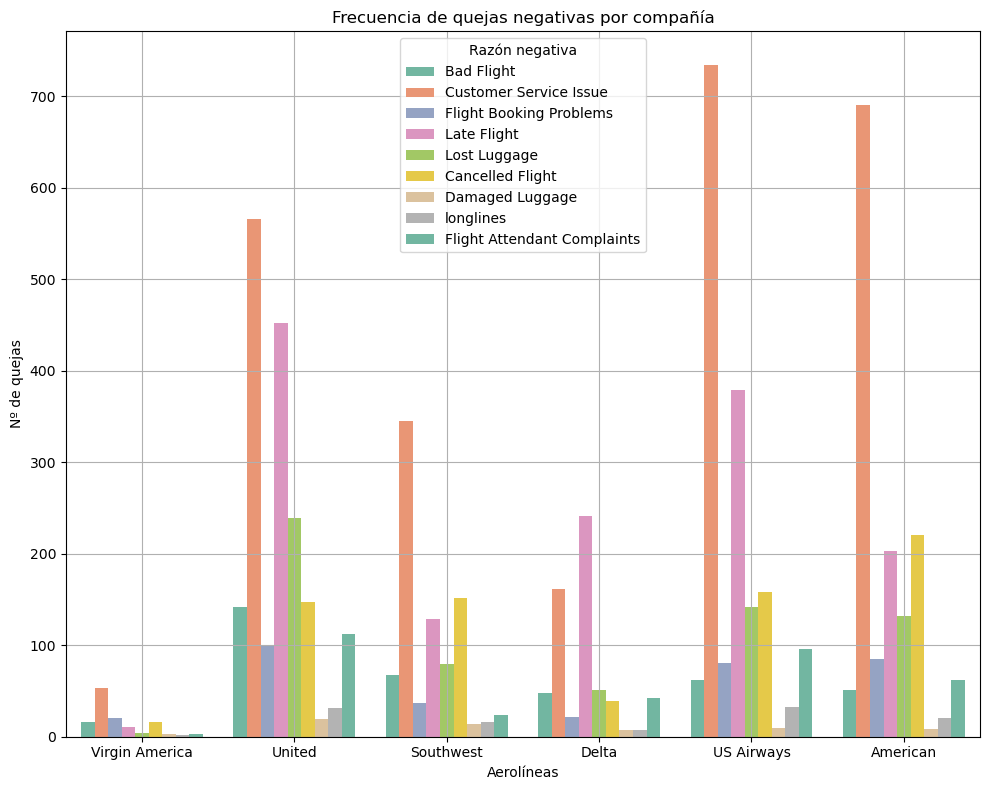

In [1958]:
plt.figure(figsize=(10,8))
sns.countplot(data = df, x = df['airline'], hue = df['negativereason'], palette = 'Set2')
plt.xlabel('Aerolíneas')
plt.ylabel('Nº de quejas')
plt.title('Frecuencia de quejas negativas por compañía')
plt.grid(True)
plt.legend(title='Razón negativa')
plt.tight_layout()
plt.show()


# WordClouds

In [1960]:
!pip install wordcloud
from wordcloud import WordCloud


Text(0.5, 1.0, 'Bad Flight')

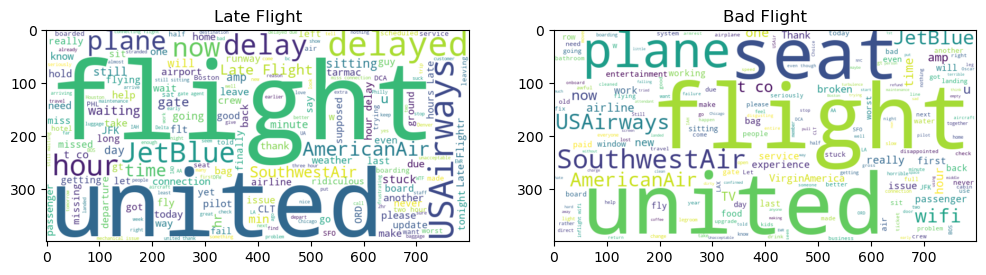

In [1961]:
text1 = " ".join(df[df['negativereason'] == 'Late Flight']['text'])
wc1 = WordCloud(width=800, height=400, background_color='white').generate(text1)

text2 = " ".join(df[df['negativereason'] == 'Bad Flight']['text'])
wc2 = WordCloud(width=800, height=400, background_color='white').generate(text2)

plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.imshow(wc1, interpolation = 'bilinear')
plt.title('Late Flight')

plt.subplot(1,2,2)
plt.imshow(wc2, interpolation = 'bilinear')
plt.title('Bad Flight')


Text(0.5, 1.0, 'Flight Booking Problems')

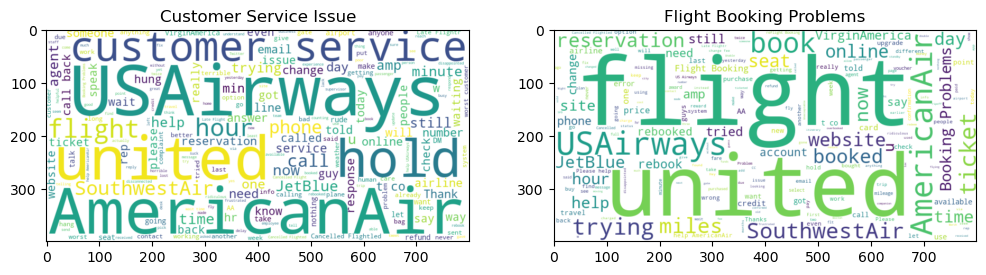

In [1962]:
text3 = " ".join(df[df['negativereason'] == 'Customer Service Issue']['text'])
wc3 = WordCloud(width=800, height=400, background_color='white').generate(text3)

text4 = " ".join(df[df['negativereason'] == 'Flight Booking Problems']['text'])
wc4 = WordCloud(width=800, height=400, background_color='white').generate(text4)

plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.imshow(wc3, interpolation = 'bilinear')
plt.title('Customer Service Issue')

plt.subplot(1,2,2)
plt.imshow(wc4, interpolation = 'bilinear')
plt.title('Flight Booking Problems')


Text(0.5, 1.0, 'Cancelled Flight')

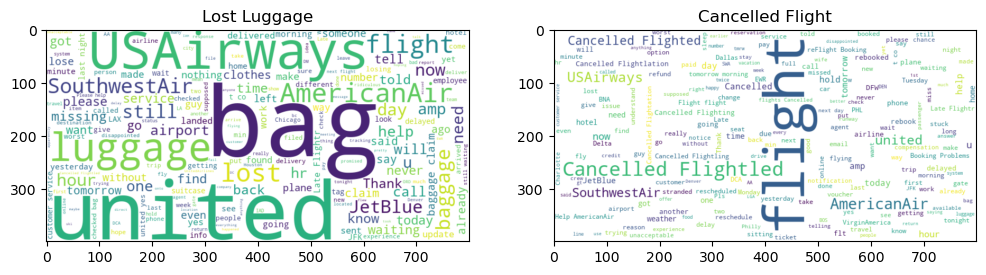

In [1963]:
text5 = " ".join(df[df['negativereason'] == 'Lost Luggage']['text'])
wc5 = WordCloud(width=800, height=400, background_color='white').generate(text5)

text6 = " ".join(df[df['negativereason'] == 'Cancelled Flight']['text'])
wc6 = WordCloud(width=800, height=400, background_color='white').generate(text6)

plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.imshow(wc5, interpolation = 'bilinear')
plt.title('Lost Luggage')

plt.subplot(1,2,2)
plt.imshow(wc6, interpolation = 'bilinear')
plt.title('Cancelled Flight')


Text(0.5, 1.0, 'Longlines')

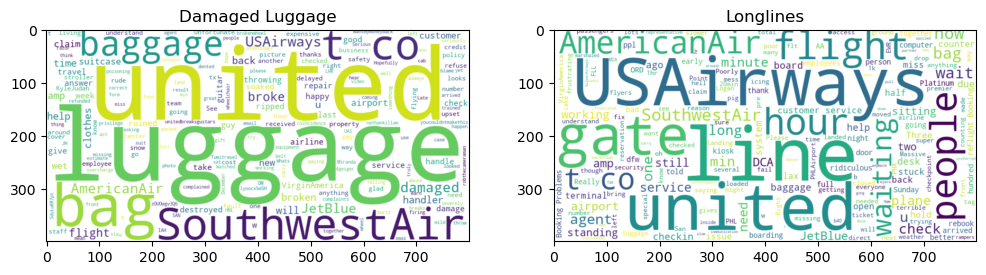

In [1964]:
text7 = " ".join(df[df['negativereason'] == 'Damaged Luggage']['text'])
wc7 = WordCloud(width=800, height=400, background_color='white').generate(text7)

text8 = " ".join(df[df['negativereason'] == 'longlines']['text'])
wc8 = WordCloud(width=800, height=400, background_color='white').generate(text8)

plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.imshow(wc7, interpolation = 'bilinear')
plt.title('Damaged Luggage')

plt.subplot(1,2,2)
plt.imshow(wc8, interpolation = 'bilinear')
plt.title('Longlines')

Text(0.5, 1.0, 'Flight Attendant complaints')

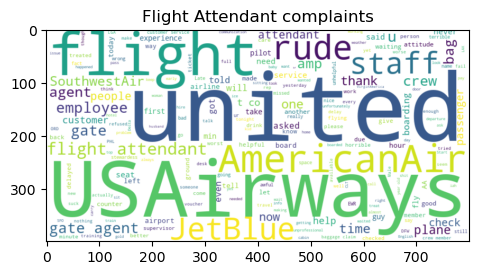

In [1965]:
text9 = " ".join(df[df['negativereason'] == 'Flight Attendant Complaints']['text'])
wc9 = WordCloud(width=800, height=400, background_color='white').generate(text9)

plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.imshow(wc9, interpolation = 'bilinear')
plt.title('Flight Attendant complaints')


# Análisis de los Wordclouds:
### 1. Bad Flight

Palabras dominantes: united, flight, seat, plane

Quejas generales sobre la experiencia en vuelo. Muchas menciones a la compañía United.

### 2. Customer Service Issue
Palabras dominantes: hold, service, customer, USAIRWAYS, AmericanAir

Problemas con la atención al cliente, especialmente en llamadas telefónicas ("on hold") y por parte de US Airways y American Airlines.

### 3. Flight Booking Problems
Palabras dominantes: flight, book, site, ticket, online

Quejas sobre el proceso de reserva online. Menciones a problemas técnicos o frustraciones en la web.

### 4. Late Flight
Palabras dominantes: delayed, flight, gate, now, hour, plane

Retrasos frecuentes. Posiblemente tweets escritos en el momento del retraso. Muy centrado en la palabra "delayed".

### 5. Lost Luggage
Palabras dominantes: luggage, bag, lost, please, claim

Quejas directas tras perder el equipaje. Se nota un tono más suplicante ("please", "help").

### 6. Cancelled Flight
Palabras dominantes: flight, cancelled, today, book, help

Cancelaciones de vuelos, solicitudes de ayuda inmediata. La palabra "cancelled" aparece muy destacada.

### 7. Damaged Luggage
Palabras dominantes: luggage, bag, broken, baggage, damaged

Quejas sobre el estado del equipaje. Destacan términos como "broken", "damaged", típicos de este tipo de incidencias.

### 8. Longlines
Palabras dominantes: waiting, time, line, security, gate

Quejas sobre largas colas, especialmente en check-in, seguridad y embarque. Muy orientado a la experiencia de espera.

### 9. Flight Attendant Complaints
Palabras dominantes: rude, employee, attendant, staff, service

Problemas con la actitud del personal de cabina. Palabras como "rude" indican un tono muy negativo.



# Observaciones generales
"United" aparece en casi todos los word clouds, lo que podría indicar que recibe una mayor proporción de quejas en general.



# Análisis de las horas de los tweets

In [1968]:
df['tweet_created'] = pd.to_datetime(df['tweet_created'])

df['day_of_week'] = df['tweet_created'].dt.day_name()
df['hour'] = df['tweet_created'].dt.hour


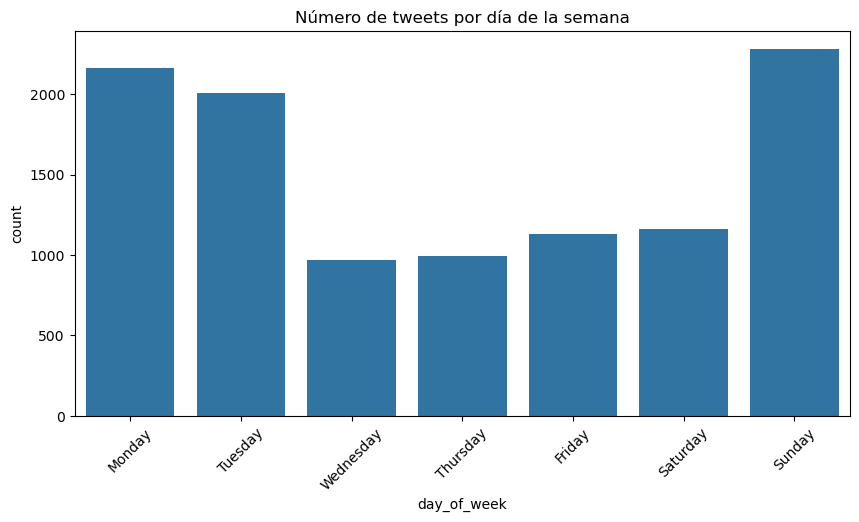

In [1969]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='day_of_week', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Número de tweets por día de la semana')
plt.xticks(rotation=45)
plt.show()


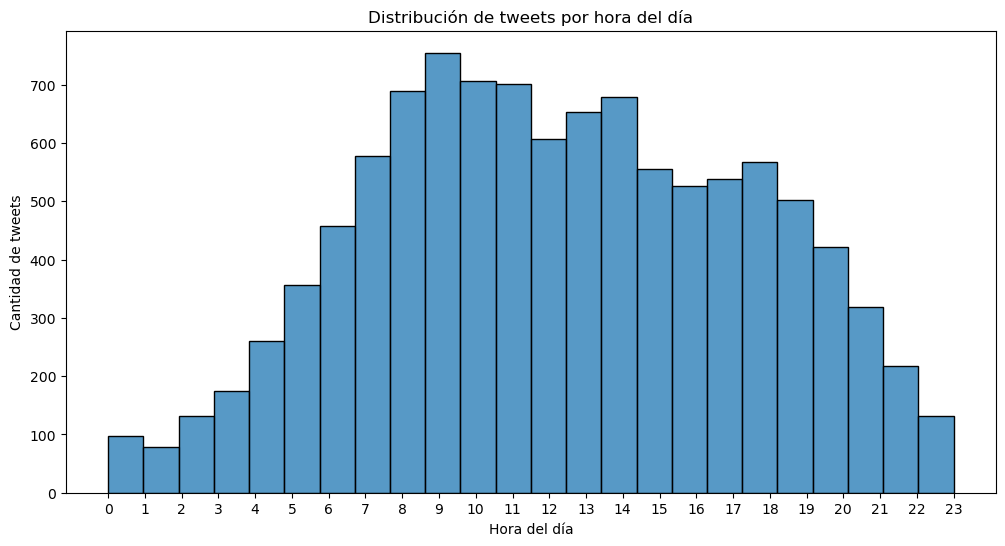

In [1970]:
plt.figure(figsize=(12,6))
sns.histplot(data=df, x='hour', bins=24, kde=False)
plt.title('Distribución de tweets por hora del día')
plt.xlabel('Hora del día')
plt.ylabel('Cantidad de tweets')
plt.xticks(range(0,24))
plt.show()


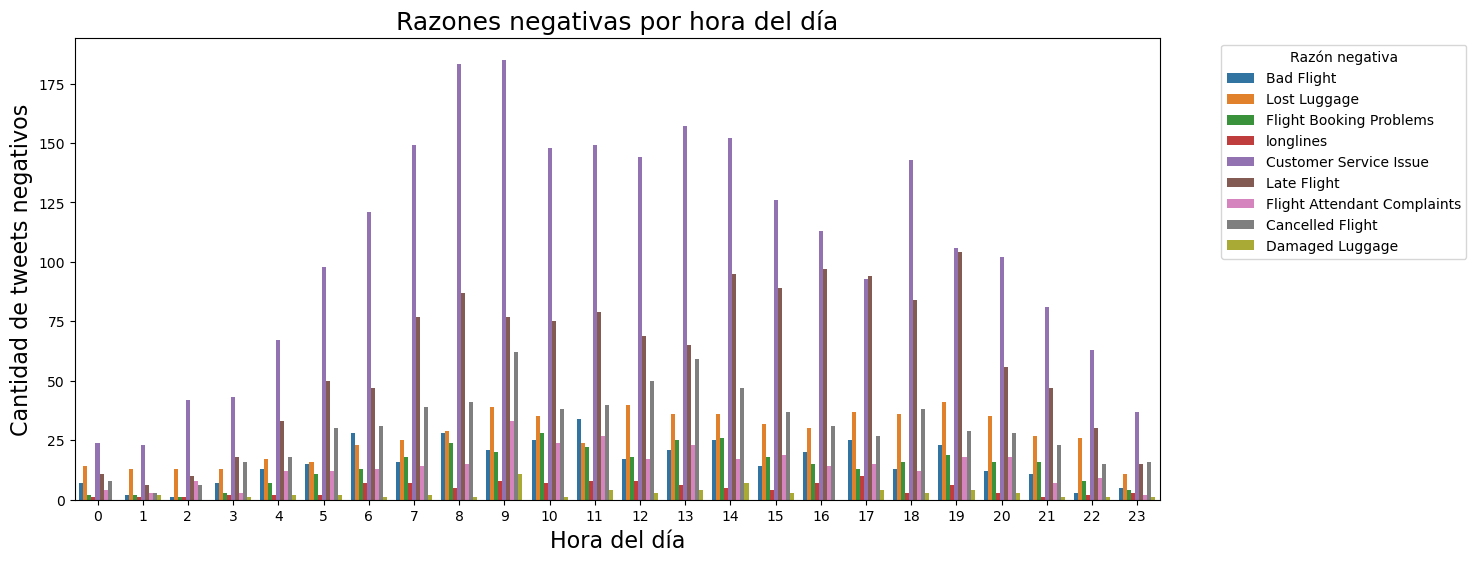

In [1971]:
plt.figure(figsize=(14,6))
sns.countplot(data=df[df['airline_sentiment'] == 'negative'], x='hour', hue='negativereason', palette='tab10')
plt.title('Razones negativas por hora del día', fontsize = 18)
plt.xlabel('Hora del día', fontsize = 16)
plt.ylabel('Cantidad de tweets negativos', fontsize = 16)
plt.legend(title='Razón negativa', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(range(0,24))
plt.show()


# Análisis de los tweets y quejas durante el dia:
- Ambos gráficos coinciden en los picos (8 AM - 10 AM): alto estrés matutino, posibles retrasos iniciales y quejas.

- Coinciden también en el segundo pico de quejas y tweets(2 PM - 4 PM)

- Coinciden también en el tercer pico de quejas y tweets (6 PM)

- Coinciden en la bajada de quejas y tweets (7 PM - 12 PM)

- Coinciden también en la actividad mínima (12 PM - 6 AM)



# Conclusiones

- La mayoría de los tweets son negativos, con United y American Airlines como las más criticadas.
- La razón más común para quejas negativas es el servicio al cliente.
- Muchos tweets negativos tienen baja confianza, lo que justifica su limpieza.
- El análisis por hora sugiere que las quejas se concentran durante ciertas franjas horarias.

